In [ ]:
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np

from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.backend import log, mean
from keras.layers import Dense, Flatten, Activation, Dropout, Input
from keras.optimizers import Adam
from keras.losses import BinaryFocalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

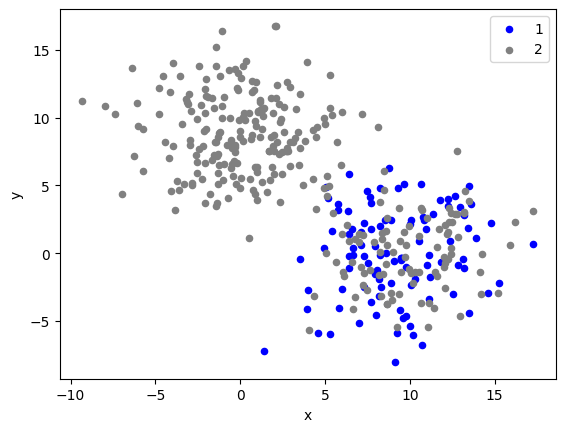

In [ ]:
# generate 2d classification dataset
pX, py = make_blobs(n_samples=100, center_box=[0,10], cluster_std=3, centers=[[9,0]], n_features=2)
py[:] = 1
nX, ny = make_blobs(n_samples=100, center_box=[0,10], cluster_std=3, centers=[[0,9]], n_features=2)
u_X, u_y = make_blobs(n_samples=200, center_box=[0,10], cluster_std=3, centers=[[0,9], [9,0]], n_features=2)
uX = np.append(u_X, nX, axis=0)
uy = np.append(u_y, ny)
before_uy = uy.copy()
uy[:]=2
X = np.append(pX[:,0], uX[:,0])
y = np.append(pX[:,1], uX[:,1])
label = np.append(py,uy)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X, y=y, label=label))
colors = {0:'red', 1:'blue', 2:'gray'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
unpX = pX.copy()
unuX = uX.copy()
pX = normalize(pX, axis=0)
uX = normalize(uX, axis=0)
uy = uy.astype(np.float32)
pX, py = shuffle(pX, py)
repeat = True
reps=20
while repeat or reps>0:
  uX, uy, before_uy = shuffle(uX, uy, before_uy)
  sl = len(pX)
  bagX = uX[:sl]
  bagy = uy[:sl]
  unbagX = uX[sl:]
  unbagy = uy[sl:]
  X = np.append(pX, bagX, axis=0)
  y = np.append(py, np.zeros_like(bagy), axis=0)

  model = Sequential()
  model.add(Dense(2, input_shape=(2,)))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = Adam(learning_rate=0.05)
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(X, y, epochs=30, verbose=0)
  outputs = model.predict(unbagX, verbose=0)
  repeat = False
  reps-=1
  for i, x in enumerate(unbagy):
    if(x==2):
      repeat = True
      unbagy[i] = float(outputs[i])
    else:
      unbagy[i] = float((x+outputs[i])/2.0)
  if(repeat):
    reps+=1
  print(repeat, reps, history.history['accuracy'][-1])

True 20 0.7549999952316284
True 20 0.7250000238418579
True 20 0.8050000071525574
True 20 0.7799999713897705
True 20 0.8450000286102295
True 20 0.7549999952316284
False 19 0.7699999809265137
False 18 0.800000011920929
False 17 0.75
False 16 0.7400000095367432
False 15 0.8149999976158142
False 14 0.7900000214576721
False 13 0.8100000023841858
False 12 0.824999988079071
False 11 0.7950000166893005
False 10 0.8299999833106995
False 9 0.7300000190734863
False 8 0.7749999761581421
False 7 0.7400000095367432
False 6 0.8299999833106995
False 5 0.8349999785423279
False 4 0.8050000071525574
False 3 0.7250000238418579
False 2 0.7699999809265137
False 1 0.8100000023841858
False 0 0.7350000143051147


0.29419234 0.13517915


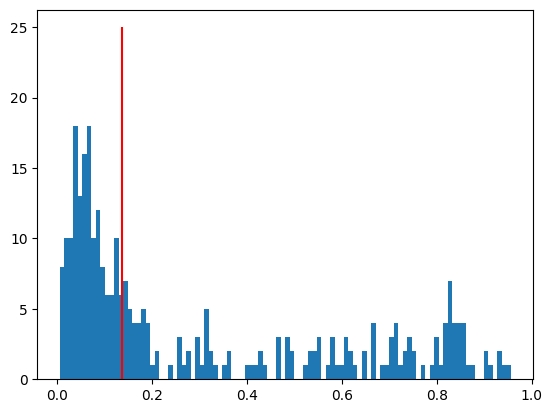

In [ ]:
print(np.average(uy), np.median(uy))
plt.hist(uy, 100)
plt.vlines(np.median(uy), 0, 25, color='red')
plt.show()

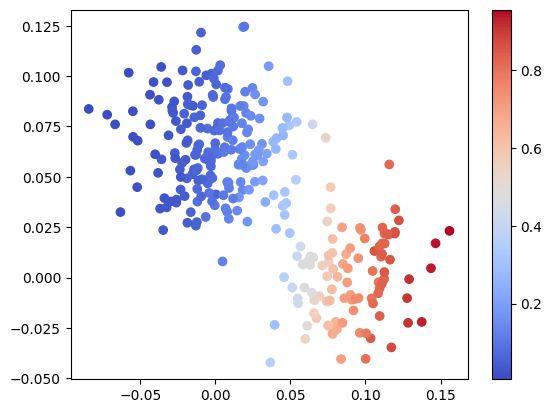

In [ ]:
plt.scatter(uX[:,0], uX[:,1], c=uy, cmap="coolwarm")
plt.colorbar()
plt.show()

In [ ]:
testX, testy = make_blobs(n_samples=400, center_box=[0,10], cluster_std=3, centers=[[0,9], [9,0]], n_features=2, random_state=789)

In [ ]:
def asym(y_true, y_pred):
  inside = (y_true * log(y_pred-y_true)) + ((1-y_true) * log(1-(y_pred-y_true)))
  loss = -mean(inside, axis=0)
  return loss

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.05)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(uX, uy, epochs=50, verbose=1)
score = model.evaluate(testX, testy.astype(float))
print(score)

Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0034 - 

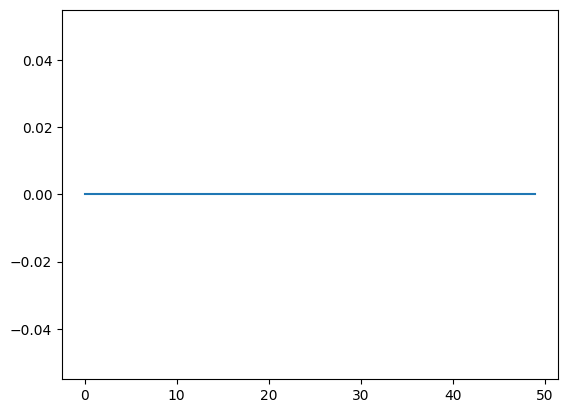

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

13/13 [==============================] - 0s 2ms/step


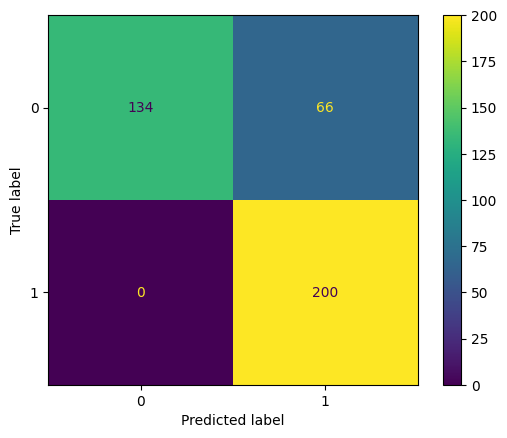

In [ ]:
pred = model.predict(testX)
prediction = np.around(pred)
cm = confusion_matrix(testy, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

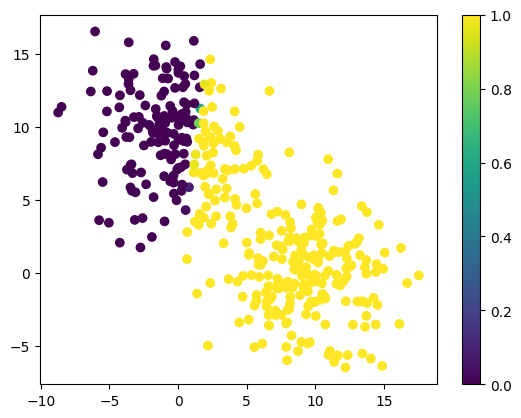

In [ ]:
plt.scatter(testX[:,0], testX[:,1], c=pred)
plt.colorbar()